# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
import os

os.getcwd()

'/Users/oluwafemibabatunde'

In [2]:
path = '/Users/oluwafemibabatunde/Desk'

In [3]:
path = '/Users/oluwafemibabatunde/Desktop/Springboard/StatsCaseStudy/FrequentistCaseStudy'

os.chdir(path)
os.listdir()

['.DS_Store',
 'DS_Store',
 'insurance2.csv',
 'Frequentist Inference Case Study - Part A (3).ipynb',
 'Frequentist Inference Case Study - Part B (2).ipynb']

In [4]:
medical = pd.read_csv('insurance2.csv')

In [5]:
medical.shape

(1338, 8)

In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
max(medical['charges'])

63770.42801

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

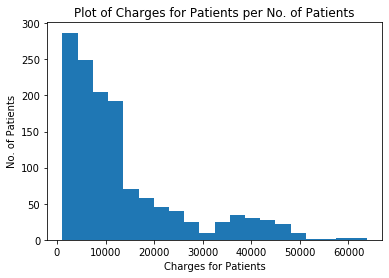

In [8]:
bins = int(np.sqrt(1338))
_ = plt.hist(medical['charges'], bins = 20)
_ = plt.xlabel('Charges for Patients')
_ = plt.ylabel('No. of Patients')
_ = plt.title('Plot of Charges for Patients per No. of Patients')

In [9]:
mean_charges = np.mean(medical['charges'])
mean_charges

13270.422265141257

In [10]:
std_charges = np.std(medical['charges'])
std_charges

12105.484975561605

The histogram plot above do not follow the normal distribution. Although the idea of CLT affirms that as n increases the sample mean will approach the real population mean through the normal distribution. Hence, the mean above do not capture the true population mean. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Going by the number of provided observation which is >30 and the dataset being randomly selected, the given dataset is strong enough to provide insight on the performance of the hospital's operational model. To assert that this data is strong enough to address concerns of the administrator, the confidence interval can be done to determine if the mean estimated lies within the confidence interval. Also, we do not know the population standard deviation, we can use the t-test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The appropriate confidence interval in this case is the is the two-sided interval. This will give the best estimate as to range of the mean given the confidence interval.

In [11]:
z = round(norm.ppf((1+0.95)/2), 2)
z

1.96

In [12]:
MOE = z * std_charges
MOE

23726.750552100744

Critical Value

In [38]:
alpha = 0.05
cv = t.ppf(1.0 - alpha, mean_charges)
cv

1.6449684594822604

Confidence Interval

In [13]:
CI_lower, CI_Upper = (mean_charges - MOE), (mean_charges + MOE)
CI_lower, CI_Upper

(-10456.328286959488, 36997.172817242)

The administrator should be concerned as the true population mean could lie anywhere within the estimated confidence interval

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ H0: People with insurance gets charged differenct amount to those without insurance. H1: People with insurance do not get charged different amount to those wthout insurance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [14]:
insured = medical.loc[medical['insuranceclaim']>0, ['charges']] 
insured.head() #Insured patients' charges

,charges
0,16884.9240
1,1725.5523
4,3866.8552
6,8240.5896
10,2721.3208


In [15]:
insured.shape

(783, 1)

In [16]:
mean_ins = np.mean(insured) #mean of insured patients 
mean_ins

charges    16423.928277
dtype: float64

In [17]:
std_ins = np.std(insured) #standard deviation of insured patients
std_ins

charges    14036.95625
dtype: float64

In [18]:
notInsured = medical.loc[medical['insuranceclaim']==0, ['charges']] 
notInsured.head() #uninsured patient charges

,charges
2,4449.46200
3,21984.47061
5,3756.62160
7,7281.50560
8,6406.41070


In [19]:
notInsured.shape

(555, 1)

In [20]:
meanNoIns = np.mean(notInsured) #mean of individuals not insured
meanNoIns

charges    8821.421892
dtype: float64

In [21]:
stdNoIns = np.std(notInsured) #std of individuals not insured
stdNoIns

charges    6440.699842
dtype: float64

The Standard Deviation of the two groups is given by:

In [22]:
Sp = np.sqrt((((783 - 1)*((std_ins)**2)) + ((555 - 1)*((stdNoIns)**2)))/(783+555-2)) 
Sp

charges    11512.282899
dtype: float64

The t-test statistics is given by:

In [23]:
t_test = (mean_ins - meanNoIns)/(Sp*(np.sqrt((1/783) + (1/555))))
t_test

charges    11.901307
dtype: float64

P-Value test for two tail test

In [39]:
p = (1 - t.cdf(abs(t_test), 1336)) * 2
p

array([0.])

In [32]:
from scipy import stats
stats.ttest_ind(insured, notInsured)

Ttest_indResult(statistic=array([11.89329903]), pvalue=array([4.46123023e-31]))

Going by the p-value of the statistics, the H0 will be rejected. Hence, people with insurance do not get charged different amount to those wthout insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No. Function to calculate Zscore exists (stats.zscore(a))

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test